In [32]:
!pip install pyedflib # BDF Format into Numpy
!pip install heartpy # Convert ECG signal to BPM

In [19]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp

In [20]:
f = pyedflib.EdfReader("/content/Part_4_N_Trial5_emotion.bdf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)

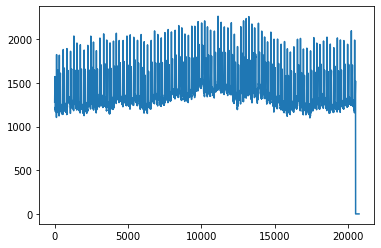

In [28]:
plt.figure()
data = sigbufs[34]
plt.plot(data)

In [30]:
wd, m = hp.process(data, sample_rate = 256.0)

bpm: 68.078400
ibi: 881.336806
sdnn: 87.153210
sdsd: 61.073241
rmssd: 105.822531
pnn20: 0.865169
pnn50: 0.674157
hr_mad: 72.265625
sd1: 74.818040
sd2: 97.497040
s: 22916.465035
sd1/sd2: 0.767388
breathingrate: 0.300000


<Figure size 864x288 with 0 Axes>

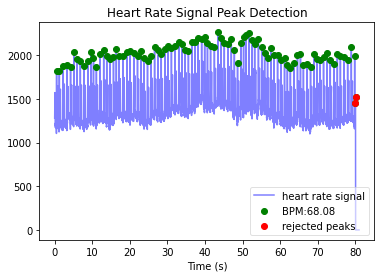

In [31]:
#set large figure
plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [33]:
# from heartpy.datautils import rolling_mean, _sliding_window
# from heartpy.peakdetection import detect_peaks

In [34]:
# Searching for parameters
# for windowsize in np.linspace(0, 1, 10):
  
#   for ma_perc in np.linspace(0, 40, 80):

#     rol_mean = rolling_mean(data, windowsize = windowsize, sample_rate = 256.0)
#     wd = detect_peaks(data, rol_mean, ma_perc= ma_perc,sample_rate = 256.0)
#     len(wd['peaklist'])